<h1>Projekt zaliczeniowy<h1>

<h3>wybrane miasto: Washington, D.C. <br> wykonał: Marcin Woś<h3>
<img src="https://fajnepodroze.pl/wp-content/uploads/2018/12/Washington.jpg" width="500"/>

In [1]:
#pip install Basemap--user
#pip install basemap-data-hires
#pip install plotly

#bublioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

C:\Users\E530\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\E530\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#dane wejściowe
dane = pd.read_csv('http://data.insideairbnb.com/united-states/dc/washington-dc/2022-03-19/data/listings.csv.gz')

In [3]:
print('ilość rekodów w próbce to: ',len(dane))
print('ilość zaminnych (kolumny): ',len(dane.columns))

ilość rekodów w próbce to:  7403
ilość zaminnych (kolumny):  74


In [4]:
dane.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
dane.describe()

id     scrape_id       host_id  host_listings_count  \
count  7.403000e+03  7.403000e+03  7.403000e+03          7402.000000   
mean   1.609766e+16  2.022032e+13  1.084405e+08           135.442718   
std    9.402042e+16  3.211154e+00  1.254023e+08           502.152733   
min    3.686000e+03  2.022032e+13  4.492000e+03             0.000000   
25%    1.682768e+07  2.022032e+13  1.515593e+07             1.000000   
50%    3.349886e+07  2.022032e+13  4.800549e+07             2.000000   
75%    4.744941e+07  2.022032e+13  1.542824e+08             8.000000   
max    5.852737e+17  2.022032e+13  4.495866e+08          2972.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                7402.000000                           0.0  7403.000000   
mean                  135.442718                           NaN    38.910992   
std                   502.152733                           NaN     0.025307   
min                     0.000000                           NaN    38.820280   
25%                     1.000000                           NaN    38.898080   
50%                     2.000000                           NaN    38.909850   
75%                     8.000000                           NaN    38.923560   
max                  2972.000000                           NaN    38.997820   

         longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  7403.000000   7403.000000        0.0  ...                5628.000000   
mean    -77.016263      3.640281        NaN  ...                   4.749442   
std       0.030280      2.259241        NaN  ...                   0.397752   
min     -77.107210      0.000000        NaN  ...                   0.000000   
25%     -77.035785      2.000000        NaN  ...                   4.670000   
50%     -77.018700      3.000000        NaN  ...                   4.880000   
75%     -76.997349      4.000000        NaN  ...                   5.000000   
max     -76.910950     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            5625.000000                  5628.000000   
mean                4.864724                     4.848742   
std                 0.328336                     0.361681   
min                 0.000000                     0.000000   
25%                 4.870000                     4.850000   
50%                 4.960000                     4.960000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             5625.000000          5623.000000   
mean                 4.799902             4.714686   
std                  0.345926             0.418294   
min                  0.000000             0.000000   
25%                  4.750000             4.660000   
50%                  4.910000             4.820000   
75%                  5.000000             4.930000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     7403.000000   
mean                        23.175604   
std                         52.695225   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          7.000000   
max                        213.000000   

       calculated_host_listings_count_entire_homes  \
count                                  7403.000000   
mean                                     21.517088   
std                                      52.733497   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                     213.000000   

       calculated_host_listings_count_private_room

In [6]:
pd.set_option('display.max_columns',100) #wyswietlenie wszystkich kolumn (do 100)
pd.set_option('display.max.rows',5) #zamiast head(5)
dane

id                                      listing_url  \
0     558788119405795275  https://www.airbnb.com/rooms/558788119405795275   
1               22245555            https://www.airbnb.com/rooms/22245555   
...                  ...                                              ...   
7401            16434871            https://www.airbnb.com/rooms/16434871   
7402            48252468            https://www.airbnb.com/rooms/48252468   

           scrape_id last_scraped  \
0     20220319010105   2022-03-20   
1     20220319010105   2022-03-20   
...              ...          ...   
7401  20220319010105   2022-03-20   
7402  20220319010105   2022-03-21   

                                                   name  \
0                         Cozy privet Room near metro 7   
1     Bright Room with Private Bathroom, Futon and Desk   
...                                                 ...   
7401                Master Bedroom nestled in the trees   
7402        A home you will love | 1BR in Silver Spring   

                                            description  \
0     You will have exclusive to our beautifully rec...   
1     Spacious, clean private room with abundant sun...   
...                                                 ...   
7401  What do I love about my house? While it is les...   
7402  Stay for 31+ nights (minimum nights and rates ...   

                                  neighborhood_overview  \
0     A minute walk to capital heights metro stops ....   
1     Mount Rainier, MD is on the border of NE DC  (...   
...                                                 ...   
7401  Downtown Silver Spring has coffee shops, resta...   
7402  Conveniently located just north of DC, 1200 Ea...   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/5ee12996-7133...  182305052   
1     https://a0.muscache.com/pictures/b3bd2197-bc4a...    3741381   
...                                                 ...        ...   
7401  https://a0.muscache.com/pictures/a3499402-71d5...  103521317   
7402  https://a0.muscache.com/pictures/a4re/floorpla...  368944610   

                                         host_url host_name  host_since  \
0     https://www.airbnb.com/users/show/182305052      Sofi  2018-04-03   
1       https://www.airbnb.com/users/show/3741381     Geeta  2012-10-02   
...                                           ...       ...         ...   
7401  https://www.airbnb.com/users/show/103521317   Pascale  2016-11-13   
7402  https://www.airbnb.com/users/show/368944610     Casey  2020-09-23   

                                          host_location  \
0       Washington, District of Columbia, United States   
1     Washington, D.C., District of Columbia, United...   
...                                                 ...   
7401             Silver Spring, Maryland, United States   
7402                      Houston, Texas, United States   

                                             host_about  host_response_time  \
0     Hello :)\n\nI am friendly host who lives & wor...      within an hour   
1     Friendly, relaxed, considerate. I have hosted ...  a few days or more   
...                                                 ...                 ...   
7401  I am an Australian living in the US. I have tr...      within an hour   
7402                                                NaN      within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                  100%                  99%                 t   
1                   20%                  10%                 f   
...                 ...                  ...               ...   
7401               100%                 100%                 t   
7402               100%                  87%                 f   

                                     host_thumbnail_url  \
0     https://a0.muscache.com/im/pictures/user/78ee4...   
1     https://a0.muscache.com/im/pictures/user/b3e43..

In [7]:
dane.dtypes

id                                               int64
listing_url                                     object
                                                ...   
calculated_host_listings_count_shared_rooms      int64
reviews_per_month                              float64
Length: 74, dtype: object

In [8]:
#Sprawdzam ilość unikatowych wartosci w ramach poszczególnych parametrów
pd.set_option('display.max.rows',1000)
tabela=[]
for kolumna in dane.columns:
    tabela.append([kolumna, dane[kolumna].dtypes, dane[kolumna].unique().size])
ramka = pd.DataFrame(tabela)
ramka.columns = ['column name','type','unique values count']
    
print(ramka.sort_values(by='unique values count'))


                                     column name     type  unique values count
2                                      scrape_id    int64                    1
48                              calendar_updated  float64                    1
34                                     bathrooms  float64                    1
28                  neighbourhood_group_cleansed  float64                    1
3                                   last_scraped   object                    2
49                              has_availability   object                    2
68                              instant_bookable   object                    2
54                         calendar_last_scraped   object                    2
24                          host_has_profile_pic   object                    3
25                        host_identity_verified   object                    3
17                             host_is_superhost   object                    3
32                                     room_type   o

In [9]:
#wyświetlamy tylko kolumny object (zawierające "stringi")
dane[list(dane.columns[dane.dtypes == object])].head(5)

listing_url last_scraped  \
0  https://www.airbnb.com/rooms/558788119405795275   2022-03-20   
1            https://www.airbnb.com/rooms/22245555   2022-03-20   
2            https://www.airbnb.com/rooms/54038522   2022-03-20   
3            https://www.airbnb.com/rooms/15618501   2022-03-20   
4            https://www.airbnb.com/rooms/34191748   2022-03-20   

                                                name  \
0                      Cozy privet Room near metro 7   
1  Bright Room with Private Bathroom, Futon and Desk   
2          CONFORTABLE BEDROOM 3 IN THE LUXURY HOUSE   
3  Ahhhh Relaxing!!!(& Most Comfortable Bed EVER!!!)   
4      Sunny, Spacious Private Room and Private Bath   

                                         description  \
0  You will have exclusive to our beautifully rec...   
1  Spacious, clean private room with abundant sun...   
2  Enjoy your stay in (Blas Airbnb), new and remo...   
3  My place is great 4 couples, solo adventurers,...   
4  Spacious, clean private room with abundant sun...   

                               neighborhood_overview  \
0  A minute walk to capital heights metro stops ....   
1  Mount Rainier, MD is on the border of NE DC  (...   
2                                                NaN   
3  1.5 miles from Md, Catholic & Gallaudet Univ, ...   
4  Mount Rainier, MD is on the border of NE DC  (...   

                                         picture_url  \
0  https://a0.muscache.com/pictures/5ee12996-7133...   
1  https://a0.muscache.com/pictures/b3bd2197-bc4a...   
2  https://a0.muscache.com/pictures/4ad2f636-1821...   
3  https://a0.muscache.com/pictures/7e6e51a3-7c17...   
4  https://a0.muscache.com/pictures/9f159a7a-9214...   

                                      host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/182305052      Sofi  2018-04-03   
1    https://www.airbnb.com/users/show/3741381     Geeta  2012-10-02   
2  https://www.airbnb.com/users/show/344160796    Blasco  2020-04-18   
3   https://www.airbnb.com/users/show/67905334  Deatrice  2016-04-19   
4    https://www.airbnb.com/users/show/3741381     Geeta  2012-10-02   

                                       host_location  \
0    Washington, District of Columbia, United States   
1  Washington, D.C., District of Columbia, United...   
2           Capitol Heights, Maryland, United States   
3    Washington, District of Columbia, United States   
4  Washington, D.C., District of Columbia, United...   

                                          host_about  host_response_time  \
0  Hello :)\n\nI am friendly host who lives & wor...      within an hour   
1  Friendly, relaxed, considerate. I have hosted ...  a few days or more   
2                                                NaN      within an hour   
3  Hard working, very busy, \r\nvery relaxed easy...  within a few hours   
4  Friendly, relaxed, considerate. I have hosted ...  a few days or more   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  99%                 t   
1                20%                  10%                 f   
2               100%                 100%                 f   
3               100%                 100%                 f   
4                20%                  10%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/78ee4...   
1  https://a0.muscache.com/im/pictures/user/b3e43...   
2  https://a0.muscache.com/im/pictures/user/0c973...   
3  https://a0.muscache.com/im/pictures/user/f3f65...   
4  https://a0.muscache.com/im/pictures/user/b3e43...   

                                    host_picture_url  \
0  https://a0.muscache.com/im/pictures/user/78ee4...   
1  https://a0.muscache.com/im/pictures/user/b3e43...   
2  https://a0.muscache.com/im/pictures/user/0c973...   
3  https://a0.muscache.com/im/pictures/user/f3f65...   
4  https://a0.muscache.com/im/pictures/user/b3e43...   

        

In [10]:
#redukcja ilości kolumn

dane.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis=1, inplace = True)

In [11]:
dane

host_is_superhost  latitude  longitude                     property_type  \
0                    t  38.88830 -76.912507  Private room in residential home   
1                    f  38.93727 -76.958840  Private room in residential home   
2                    f  38.91226 -76.932940  Private room in residential home   
3                    f  38.93637 -76.964360          Private room in bungalow   
4                    f  38.94070 -76.963930  Private room in residential home   
...                ...       ...        ...                               ...   
7398                 f  38.99159 -77.029040         Entire serviced apartment   
7399                 f  38.99240 -77.029350         Entire serviced apartment   
7400                 t  38.95929 -76.992270                Entire rental unit   
7401                 t  38.99664 -77.040750  Private room in residential home   
7402                 f  38.99039 -77.029790         Entire serviced apartment   

            room_type  bathrooms_text  bedrooms  beds  \
0        Private room   1 shared bath       1.0   1.0   
1        Private room  1 private bath       1.0   2.0   
2        Private room  1 private bath       1.0   1.0   
3        Private room   1 shared bath       1.0   1.0   
4        Private room  1 private bath       1.0   3.0   
...               ...             ...       ...   ...   
7398  Entire home/apt          1 bath       1.0   1.0   
7399  Entire home/apt         2 baths       2.0   2.0   
7400  Entire home/apt          1 bath       1.0   2.0   
7401     Private room   1 shared bath       1.0   1.0   
7402  Entire home/apt          1 bath       1.0   1.0   

                                              amenities    price  \
0     ["Wifi", "TV", "LG oven", "Safe", "Trash compa...   $40.00   
1     ["Heating", "Wifi", "Fire extinguisher", "Sham...   $25.00   
2     ["Air conditioning", "Wifi", "Carbon monoxide ...   $50.00   
3     ["Wifi", "Fire extinguisher", "Shampoo", "Lock...   $34.00   
4     ["Dryer", "Essentials", "Heating", "Carbon mon...   $35.00   
...                                                 ...      ...   
7398  ["Wifi", "TV", "Patio or balcony", "Shampoo", ...  $202.00   
7399  ["Wifi", "TV", "Patio or balcony", "Pool", "Sh...  $244.00   
7400  ["Heating", "Wifi", "TV", "Shampoo", "Dryer", ...   $78.00   
7401  ["Heating", "Wifi", "TV", "Shampoo", "Lock on ...   $55.00   
7402  ["Wifi", "TV", "Patio or balcony", "Shampoo", ...  $192.00   

      number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                     3                  5.00                    5.00   
1                    19                  4.78                    4.84   
2                     2                  5.00                    5.00   
3                    10                  4.80                    4.80   
4                     1                  5.00                    5.00   
...                 ...                   ...                     ...   
7398                  0                   NaN                     NaN   
7399                  0                   NaN                     NaN   
7400                 25                  4.76                    4.88   
7401                 28                  4.86                    4.96   
7402                  0                   NaN                     NaN   

      review_scores_value  
0                    4.67  
1                    4.89  
2                    5.00  
3                    4.80  
4                    5.00  
...                   ...  
7398                  NaN  
7399                  NaN  
7400                 4.84  
7401                 4.82  
7402                  NaN  

[7403 rows x 14 columns]

In [12]:
dane['price'].head()

0    $40.00
1    $25.00
2    $50.00
3    $34.00
4    $35.00
Name: price, dtype: object

In [13]:
dane['price'].describe()

count        7403
unique        566
top       $100.00
freq          185
Name: price, dtype: object

In [14]:
#ceny są stringami - trzeba zamianić na float do obliczeń
dane.price = dane.price.apply(lambda x: x.replace("$", ""))
dane.price = dane.price.apply(lambda x: x.replace(",", ""))
dane.price = dane.price.astype("float")
dane.price.describe()

count     7403.000000
mean       197.079157
std        456.804058
min          0.000000
25%         85.000000
50%        127.000000
75%        202.000000
max      24999.000000
Name: price, dtype: float64

In [15]:
#typy wynajmowanych nieruchomości
dane['room_type'].unique()

array(['Private room', 'Shared room', 'Entire home/apt', 'Hotel room'],
      dtype=object)

In [16]:
#mozliwości info o łazience
dane['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '1 bath', '3 baths',
       '1.5 baths', '2 shared baths', '3.5 baths', '1.5 shared baths',
       '2.5 baths', '2 baths', '2.5 shared baths', nan, '4 baths',
       '4.5 baths', '3 shared baths', '5.5 baths', '8 shared baths',
       '0 baths', 'Half-bath', '6 baths', '0 shared baths',
       '11 shared baths', '6.5 baths', '5 baths', 'Shared half-bath',
       '50 shared baths', '3.5 shared baths', '5.5 shared baths',
       '4.5 shared baths', 'Private half-bath'], dtype=object)

In [17]:
#warunek konieczny - conajmniej prywatna łazienka lub cały apartament
#dadaje kolumnę z ta informacją
dane['Private_bathroom']=np.where(
    ((dane['bathrooms_text'].str.contains("private", case=False, na=False)) |
     (dane['room_type']=='Entire home/apt')), True, False)

In [18]:
#lista wszystkich mozliwych udogodnień - najprawdopodoniej wartości wpisywane z ręki (nie wybierane z listy)
set(dane['amenities'].sum().split('"'))

{' TV with Netflix',
 'various body soap',
 'Fast wifi \\u2013 263 Mbps',
 'Clothing storage: closet, dresser, and wardrobe',
 ' HDTV with standard cable, Netflix, Roku',
 'Dedicated workspace: office chair and table',
 'ksamsung stove',
 'Pantene shampoo',
 'HDTV with Amazon Prime Video, Chromecast',
 'HDTV with Chromecast',
 ' HDTV with Amazon Prime Video, Apple TV, HBO Max, Netflix, Roku',
 'Paid parking lot on premises \\u2013 3 spaces',
 'Fast wifi \\u2013 52 Mbps',
 'GE Ceramic Top electric stove',
 'Dedicated workspace: monitor, desk, office chair, and table',
 '72\\',
 'Zipelin  Bluetooth sound system',
 'Midsize With freezer  refrigerator',
 'Various  shampoo',
 'Pantene essential botanicals shampoo OR Kirkland Shampoo shampoo',
 'Security cameras on property',
 'sauve shampoo',
 'Slippers',
 'HDTV with Amazon Prime Video, HBO Max, Roku',
 'Washer',
 'Extra pillows and blankets',
 'Full kitchen',
 '40\\',
 'GE stove',
 ' HDTV with Apple TV, Netflix, standard cable',
 'Fire pit

In [19]:
#kolejne warunki minimum - wifi + TV + lodówka
dane['Wifi+TV+refrigerator']=np.where(  
    ((dane['amenities'].str.contains("wifi", case=False, na=False)) &
    (dane['amenities'].str.contains("TV", case=False, na=False)) & 
    (dane['amenities'].str.contains("refrigerator", case=False, na=False))), True, False)

In [20]:
filtered_data = dane.loc[(dane['Wifi+TV+refrigerator']==True) & (dane['Private_bathroom']==True)]

In [21]:
filtered_data

host_is_superhost   latitude  longitude                property_type  \
5                    t  38.987850 -77.027390  Private room in rental unit   
7                    t  38.893000 -76.978100           Entire rental unit   
9                    f  38.913933 -77.040741           Entire rental unit   
10                   t  38.878760 -76.989390    Private room in townhouse   
12                   t  38.884800 -76.984040           Entire guest suite   
...                ...        ...        ...                          ...   
7397                 f  38.990390 -77.029790    Entire serviced apartment   
7398                 f  38.991590 -77.029040    Entire serviced apartment   
7399                 f  38.992400 -77.029350    Entire serviced apartment   
7400                 t  38.959290 -76.992270           Entire rental unit   
7402                 f  38.990390 -77.029790    Entire serviced apartment   

            room_type  bathrooms_text  bedrooms  beds  \
5        Private room  1 private bath       1.0   1.0   
7     Entire home/apt          1 bath       1.0   1.0   
9     Entire home/apt          1 bath       1.0   2.0   
10       Private room  1 private bath       1.0   2.0   
12    Entire home/apt          1 bath       2.0   3.0   
...               ...             ...       ...   ...   
7397  Entire home/apt         2 baths       2.0   2.0   
7398  Entire home/apt          1 bath       1.0   1.0   
7399  Entire home/apt         2 baths       2.0   2.0   
7400  Entire home/apt          1 bath       1.0   2.0   
7402  Entire home/apt          1 bath       1.0   1.0   

                                              amenities  price  \
5     ["Heating", "Wifi", "TV", "Single level home",...   60.0   
7     ["Wifi", "TV", "Free dryer \u2013 In unit", "B...   85.0   
9     ["Wifi", "Drying rack for clothing", "Washer \...  120.0   
10    ["Heating", "Wifi", "Fire extinguisher", "Sham...  125.0   
12    ["Heating", "Wifi", "TV", "Fire extinguisher",...  119.0   
...                                                 ...    ...   
7397  ["Wifi", "TV", "Patio or balcony", "Shampoo", ...  273.0   
7398  ["Wifi", "TV", "Patio or balcony", "Shampoo", ...  202.0   
7399  ["Wifi", "TV", "Patio or balcony", "Pool", "Sh...  244.0   
7400  ["Heating", "Wifi", "TV", "Shampoo", "Dryer", ...   78.0   
7402  ["Wifi", "TV", "Patio or balcony", "Shampoo", ...  192.0   

      number_of_reviews  review_scores_rating  review_scores_accuracy  \
5                    19                  5.00                    4.95   
7                    64                  4.80                    4.91   
9                     1                  5.00                    5.00   
10                    5                  5.00                    4.60   
12                  136                  4.90                    4.93   
...                 ...                   ...                     ...   
7397                  0                   NaN                     NaN   
7398                  0                   NaN                     NaN   
7399                  0                   NaN                     NaN   
7400                 25                  4.76                    4.88   
7402                  0                   NaN                     NaN   

      review_scores_value  Private_bathroom  Wifi+TV+refrigerator  
5                    4.95              True                  True  
7                    4.81              True                  True  
9                    5.00              True                  True  
10                   5.00              True                  True  
12                   4.90              True                  True  
...                   ...               ...                   ...  
7397                  NaN              True                  True  
7398                  NaN              True                  True  
7399                  NaN              True                  True  
7400                 4.84              True  

In [22]:
#nie wypełnione pola w poszczególnych kategoriach dla wybranego zbioru
filtered_data.isna().sum(axis=0)

host_is_superhost           0
latitude                    0
longitude                   0
property_type               0
room_type                   0
bathrooms_text              0
bedrooms                  415
beds                       82
amenities                   0
price                       0
number_of_reviews           0
review_scores_rating      711
review_scores_accuracy    716
review_scores_value       717
Private_bathroom            0
Wifi+TV+refrigerator        0
dtype: int64

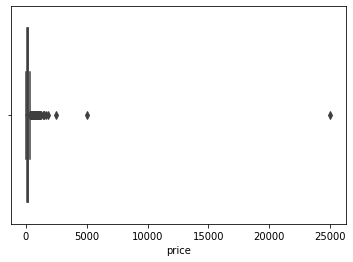

In [23]:
ax = sns.boxplot(x=filtered_data["price"])

In [24]:
# Odrzucenie outliers (max)
print("99% lokali ma cenę niższą niż {0: .2f}".format(np.percentile(filtered_data.price, 99)))
filtered_data = filtered_data[(filtered_data.price <= np.percentile(filtered_data.price, 99)) & (filtered_data.price > 0)]

99% lokali ma cenę niższą niż  755.95


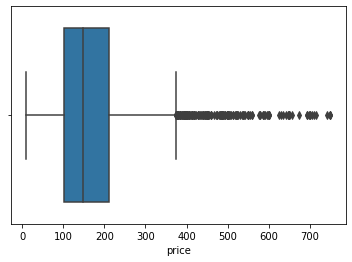

In [25]:
ax = sns.boxplot(x=filtered_data["price"])

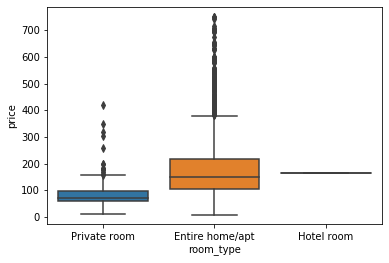

In [26]:
ax = sns.boxplot(x="room_type", y="price", data=filtered_data)

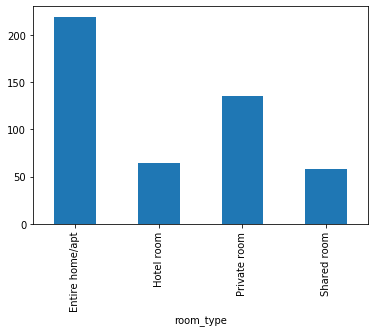

In [27]:
#średnie ceny wynajmu w poszczególnych kategoriach
room_type_avg_price = dane.groupby(['room_type'])['price'].mean()
room_type_avg_price.plot(kind="bar")

In [28]:
#tabela statystyk
tabela=[]
for i in filtered_data['room_type'].unique():
    row=[i,
         scipy.stats.skew(filtered_data['price'].loc[filtered_data['room_type']==i]),
         scipy.stats.kurtosis(filtered_data['price'].loc[filtered_data['room_type']==i])]
    tabela.append(row)
df=pd.DataFrame(tabela, columns=[['room type', 'skew', 'kurtosis']])
df.set_index('room type', inplace=True)
df

skew   kurtosis
room type                              
(Private room,)     3.139677  12.878485
(Entire home/apt,)  1.906712   5.007426
(Hotel room,)       0.000000  -3.000000

In [29]:
filtered_data.columns

Index(['host_is_superhost', 'latitude', 'longitude', 'property_type',
       'room_type', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_value', 'Private_bathroom', 'Wifi+TV+refrigerator'],
      dtype='object')

In [30]:
filtered_data['latitude'].describe()

count    3975.000000
mean       38.909905
std         0.024650
min        38.820280
25%        38.896945
50%        38.909120
75%        38.920755
max        38.996470
Name: latitude, dtype: float64

In [31]:
filtered_data['longitude'].describe()

count    3975.000000
mean      -77.016087
std         0.028855
min       -77.103320
25%       -77.034375
50%       -77.016870
75%       -76.997310
max       -76.913535
Name: longitude, dtype: float64

In [32]:
#Cena vs położenie
#source: https://plotly.com/python/mapbox-layers/
import plotly.express as px
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude', hover_data=['price', 'room_type'],
                        zoom=10, height=300,color_discrete_sequence=["#FF1493"], color=filtered_data['price'])

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
        {
            "sourcetype": "raster",
            "sourceattribution": "Government of Canada",
            "source": ["https://geo.weather.gc.ca/geomet/?"
                       "SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857"
                       "&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png"],
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [33]:
#wprowadzenie kolumn price: po nomralizacji / po standaryzacji
filtered_data['price_norm'] = (filtered_data['price']-filtered_data['price'].min())/(filtered_data['price'].max()-filtered_data['price'].min())
filtered_data['price_std'] = (filtered_data['price']-filtered_data['price'].mean())/filtered_data['price'].std()



C:\Users\E530\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\E530\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
filtered_data[['price','price_norm','price_std']].head(5)

price  price_norm  price_std
5    60.0    0.068826  -1.109435
7    85.0    0.102564  -0.864946
9   120.0    0.149798  -0.522663
10  125.0    0.156545  -0.473765
12  119.0    0.148448  -0.532442

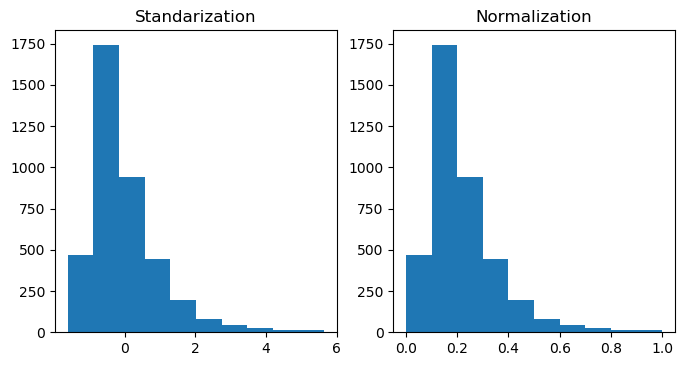

In [35]:
# Rozkład wartości "Price" po standaryzacji / Normalizacji
norm, std = plt.subplots(figsize=(8, 4), dpi=100)
#plot 1:
plt.subplot(1, 2, 1).set_title("Standarization")
plt.hist(filtered_data['price_std'])
#plot 2:
plt.subplot(1, 2, 2).set_title("Normalization")
plt.hist(filtered_data['price_norm'])

plt.show()

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



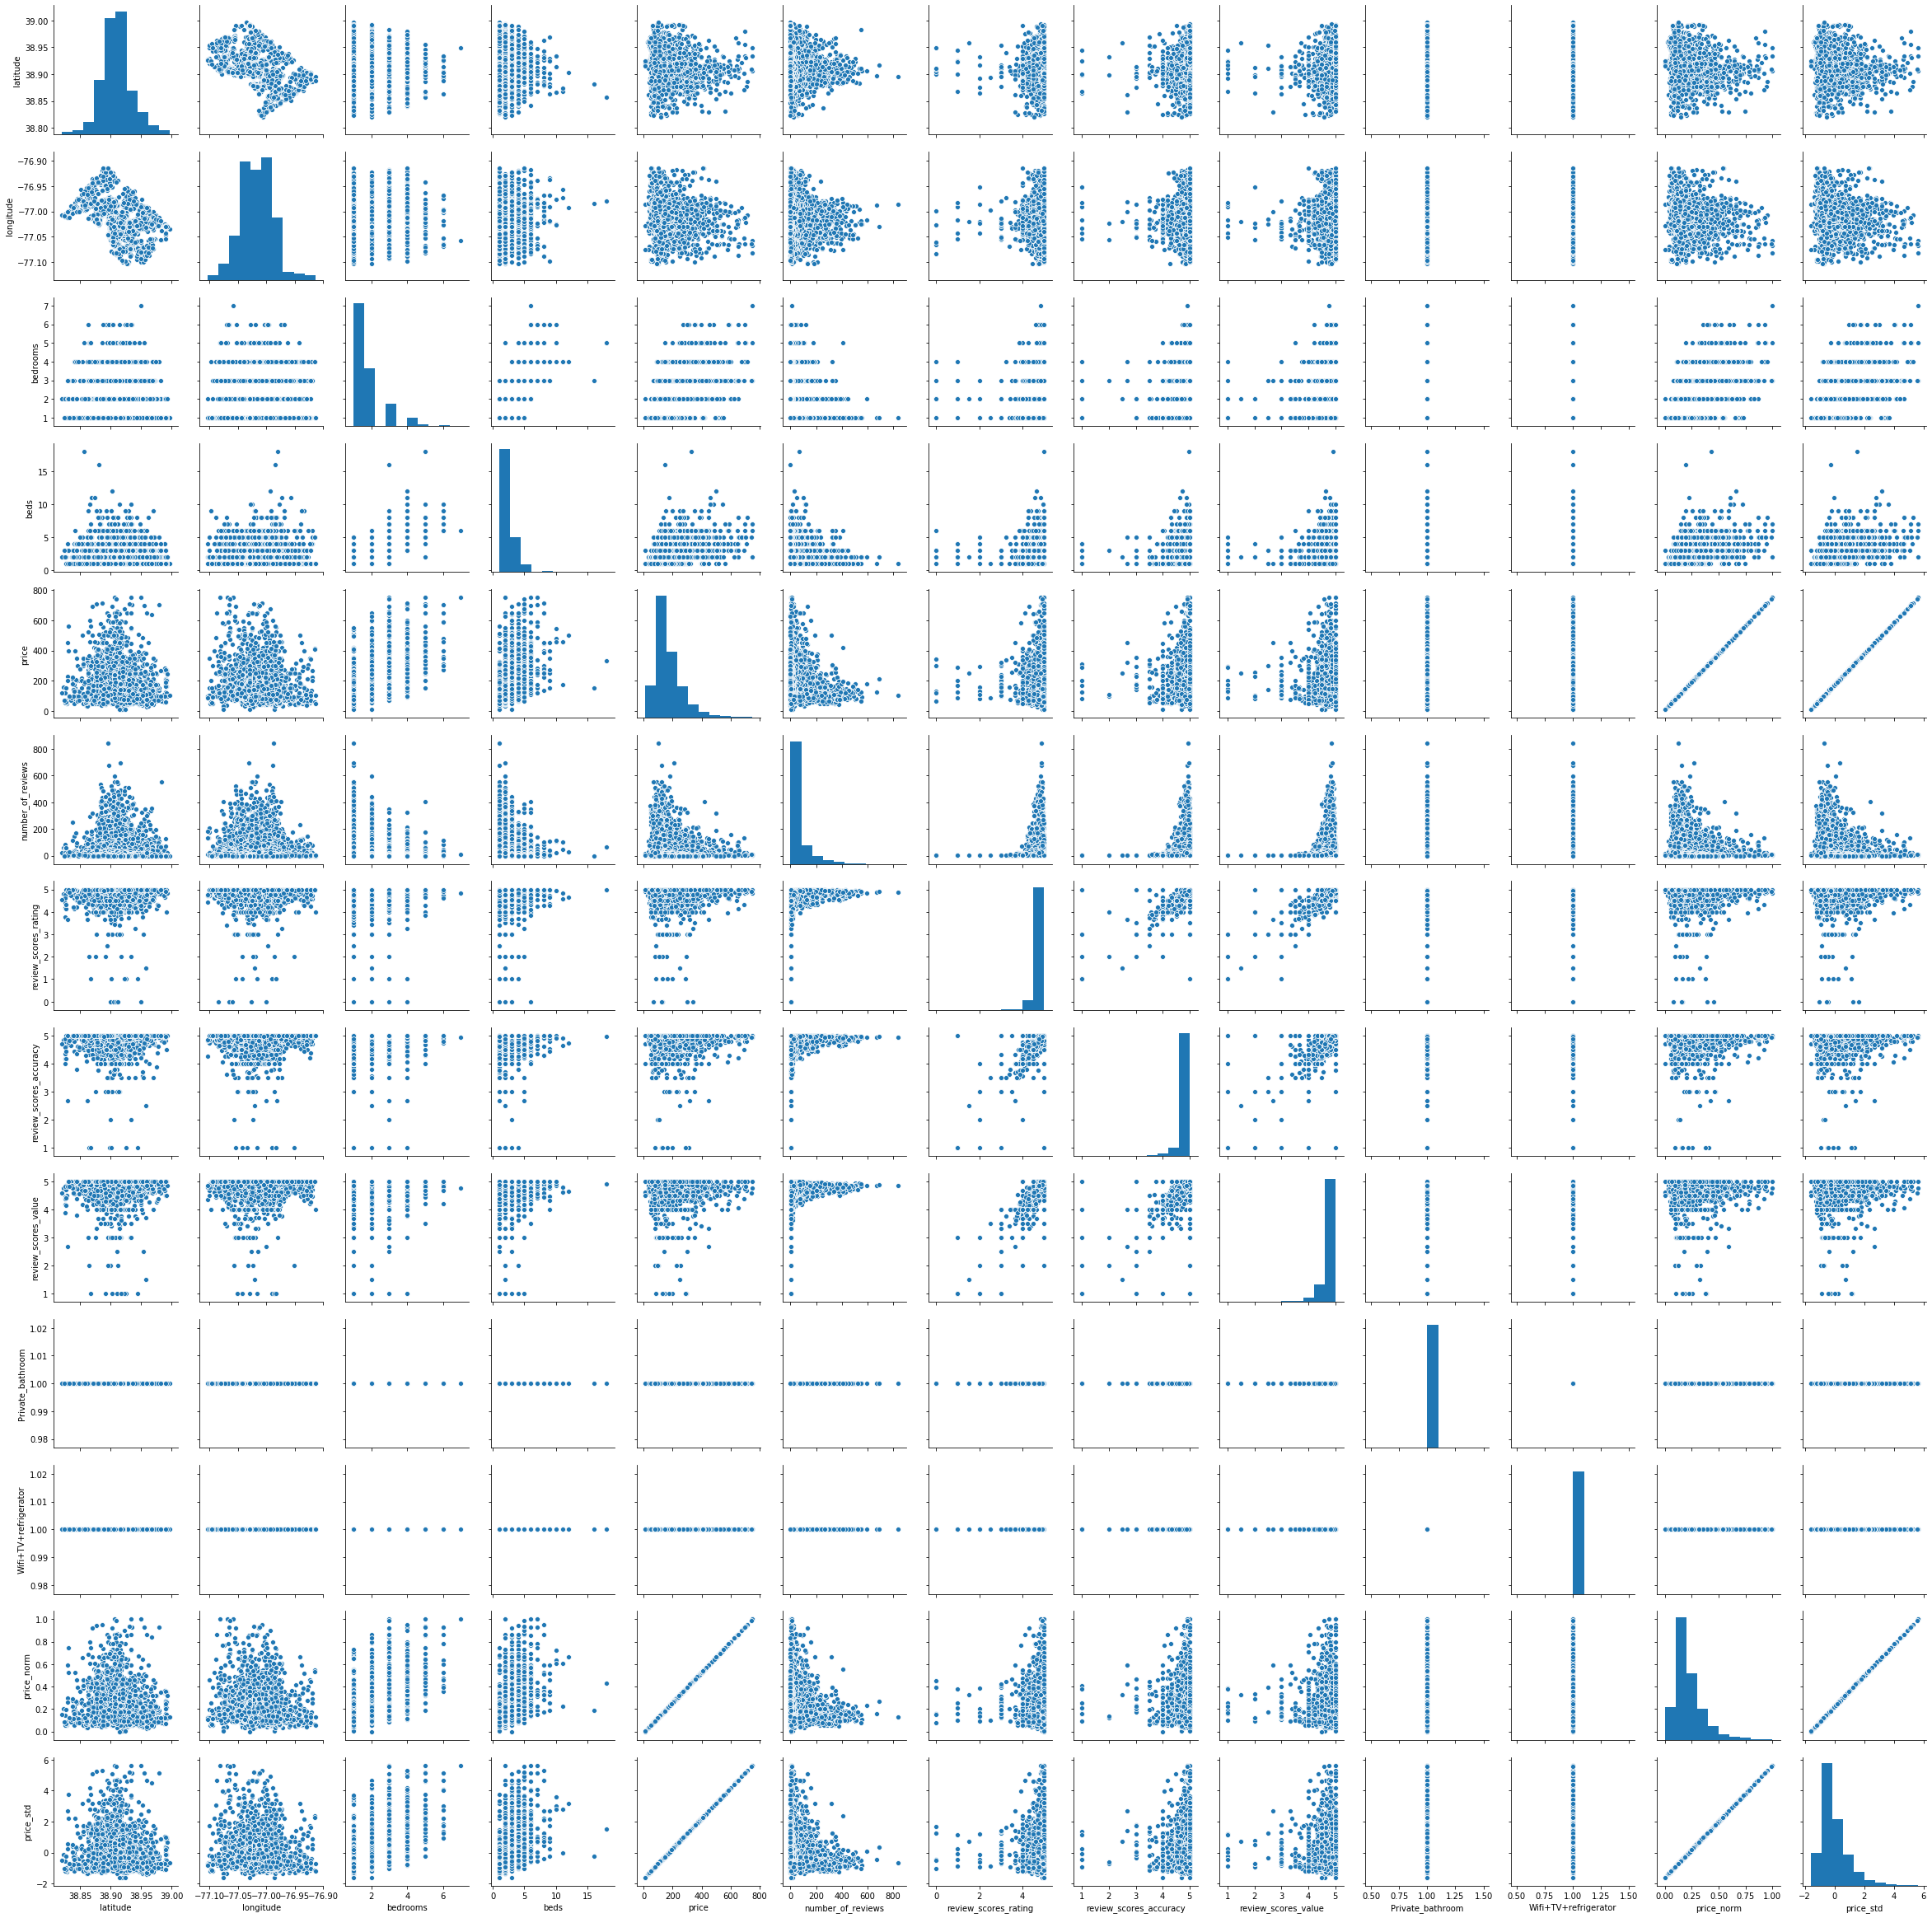

In [36]:
wykresy_par_zmiennych = sns.pairplot(filtered_data)